In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
def passive_square(x, y, z, t, xp):
    xc, yc = x - 0.5, y - 0.75
    return xp.where(
        (xp.abs(xc) < 0.15) & (xp.abs(yc) < 0.15),
        1.0,
        0.0,
    )


sim = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.slotted_disk(
        idx, x, y, z, t, rotation="ccw", xp=xp
    ),
    ic_passives={"passive_square": passive_square},
    bcx="ic",
    bcy="ic",
    nx=64,
    ny=64,
    p=3,
    MOOD=True,
    cascade="muscl",
    max_MOOD_iters=1,
    MUSCL_limiter="PP2D",
    NAD=True,
    NAD_rtol=1e-1,
    NAD_atol=1e-8,
    PAD={"rho": (0.0, 1.0)},
    SED=True,
)

sim.run(2 * np.pi)

Step #495 @ t=6.28e+00 | dt=1.02e-02 | (done)                                                       


In [3]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(-0.0007696626171968207), np.float64(1.001353333735686))

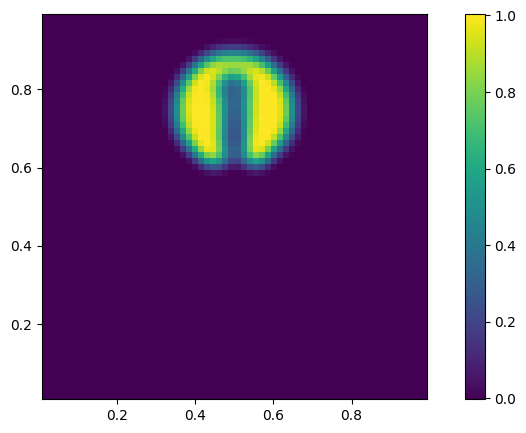

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
im, cbar = vis.plot_2d_slice(sim, ax, "rho", colorbar=True)

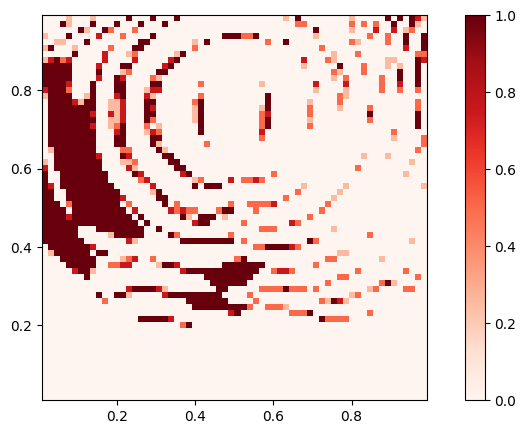

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "troubles", cmap=plt.cm.Reds)
ax.figure.colorbar(ax.images[0], ax=ax)

In [6]:
sim.timer.print_report()

Category                        Calls      Cumulative Time
------------------------------------------------------------
MOOD_loop                        1980                21.49
apply_bc                         3962                 4.06
compute_dt                        495                 0.03
cuda_sync                           0                 0.00
detect_troubled_cells            1980                 6.54
minisnapshot                      496                 0.02
revise_fluxes                    1980                14.93
riemann_solver                   7920                 1.92
snapshot                            2                 0.02
take_step                         495                34.87
wall                                1                34.91
zhang_shu_limiter                   0                 0.00

